In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Check the contents of the mounted Google Drive
drive_path = '/content/drive/MyDrive/'
os.listdir(drive_path)

In [4]:
import  zipfile

zipfile_name = "/content/drive/MyDrive/skin care dataset.zip"
try:
  with zipfile.ZipFile(zipfile_name) as zp:
    zp.extractall()
  print("Successfully extracted")
except:
  print('Error Appeared')
  print("Please CHeck the file")

Successfully extracted


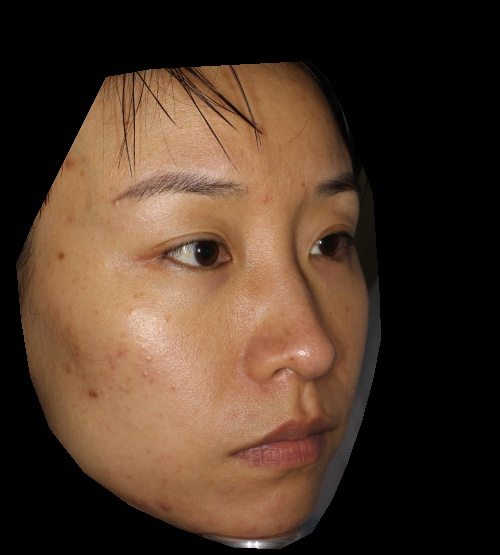

In [2]:
img = cv.imread("/content/Created Dataset/Level_0/levle0_1.jpg")
cv2_imshow(img)

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , validation_split=0.2 )

In [4]:
data_dir = "/content/Created Dataset"
train_gener = generator.flow_from_directory(directory=data_dir, target_size=(150 , 150) , class_mode = "categorical"  )

Found 999 images belonging to 3 classes.


In [5]:
val_gener = generator.flow_from_directory(directory=data_dir, target_size=(150 , 150) , class_mode = "categorical" ,   )

print(val_gener.image_shape)


Found 999 images belonging to 3 classes.
(150, 150, 3)


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' , input_shape = (150 , 150  , 3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' ))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 3 , activation = tf.nn.softmax))

In [7]:
model.compile( loss =  tf.keras.losses.binary_focal_crossentropy , metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

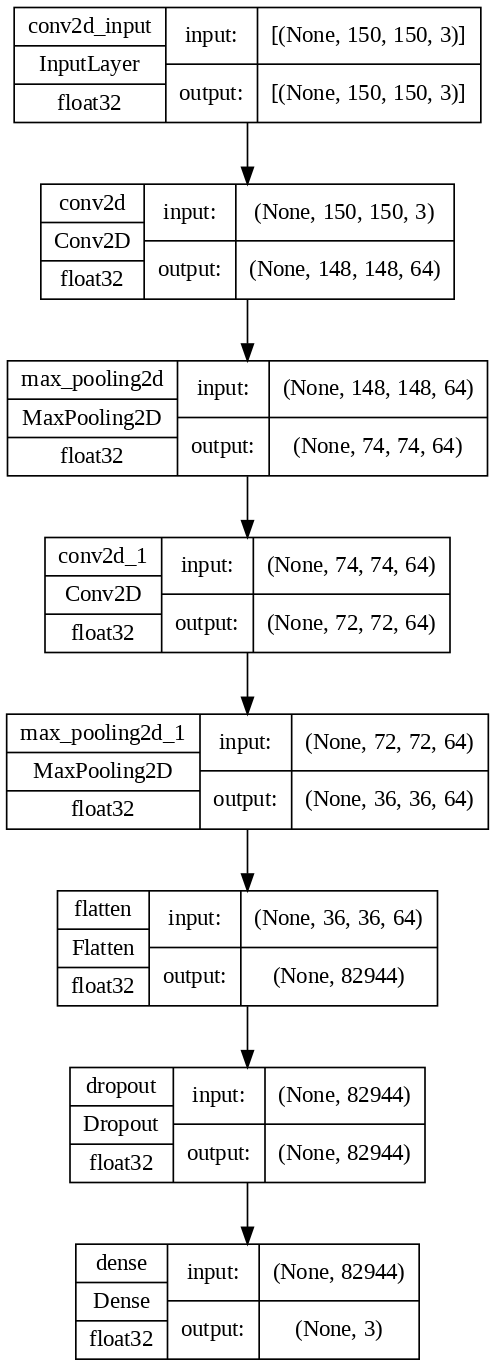

In [9]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [10]:
history = model.fit(x=train_gener, epochs=30, validation_data=val_gener)

Epoch 1/30
32/32 [==============================] - 123s 4s/step - loss: 0.2598 - accuracy: 0.4665 - val_loss: 0.1699 - val_accuracy: 0.4945
Epoch 2/30
32/32 [==============================] - 118s 4s/step - loss: 0.1727 - accuracy: 0.5015 - val_loss: 0.1644 - val_accuracy: 0.5616
Epoch 3/30
32/32 [==============================] - 117s 4s/step - loss: 0.1683 - accuracy: 0.5265 - val_loss: 0.1543 - val_accuracy: 0.6136
Epoch 4/30
32/32 [==============================] - 101s 3s/step - loss: 0.1617 - accuracy: 0.5666 - val_loss: 0.1623 - val_accuracy: 0.6176
Epoch 5/30
32/32 [==============================] - 98s 3s/step - loss: 0.1491 - accuracy: 0.6116 - val_loss: 0.1417 - val_accuracy: 0.6046
Epoch 6/30
32/32 [==============================] - 116s 4s/step - loss: 0.1386 - accuracy: 0.6356 - val_loss: 0.1199 - val_accuracy: 0.7337
Epoch 7/30
32/32 [==============================] - 116s 4s/step - loss: 0.1383 - accuracy: 0.6527 - val_loss: 0.1093 - val_accuracy: 0.7618
Epoch 8/30
32/

In [11]:
hist = history.history
print(hist)


{'loss': [0.25979849696159363, 0.17266210913658142, 0.1682620793581009, 0.16168302297592163, 0.14910556375980377, 0.13863076269626617, 0.13829250633716583, 0.12707175314426422, 0.11194760352373123, 0.09934252500534058, 0.10012367367744446, 0.08701752871274948, 0.07213708013296127, 0.06891940534114838, 0.058388710021972656, 0.054204367101192474, 0.04568022862076759, 0.04423253983259201, 0.03319000452756882, 0.03236832097172737, 0.029752375558018684, 0.029853899031877518, 0.023186134174466133, 0.03192184120416641, 0.017068246379494667, 0.017443548887968063, 0.015541106462478638, 0.02477804571390152, 0.011548605747520924, 0.01174516323953867], 'accuracy': [0.4664664566516876, 0.5015015006065369, 0.5265265107154846, 0.5665665864944458, 0.6116116046905518, 0.6356356143951416, 0.6526526808738708, 0.6936936974525452, 0.7207207083702087, 0.759759783744812, 0.7677677869796753, 0.7957957983016968, 0.8448448181152344, 0.8508508801460266, 0.8758758902549744, 0.8838838934898376, 0.9009009003639221,

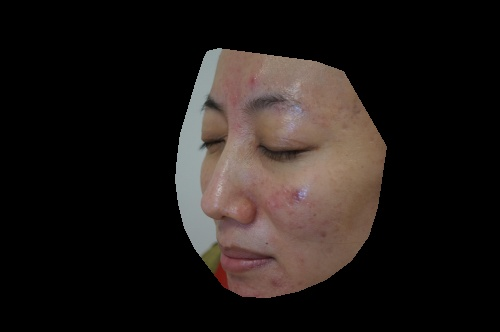

This is the shape of the image (150, 150, 3)
1/1 [==============================] - 0s 337ms/step


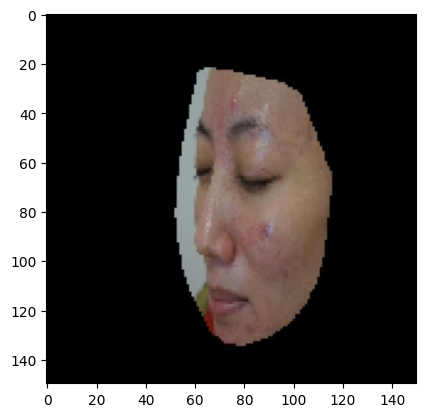

In [12]:
img_path = '/content/Created Dataset/Level_1/levle1_102.jpg'
img = cv.imread(img_path)
cv2_imshow(img)
imgp = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
plt.imshow(imgp)
x = tf.keras.preprocessing.image.img_to_array(imgp)
print("This is the shape of the image" , x.shape)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)

In [13]:
print(preds)
map_of_classes = train_gener.class_indices

[[0. 1. 0.]]


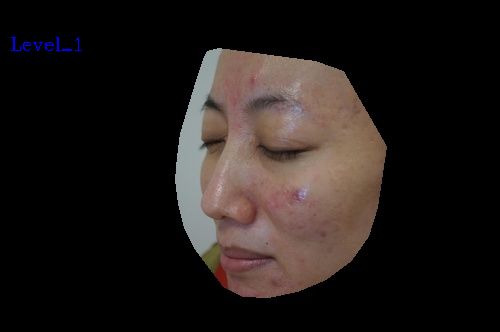

In [14]:
result = ""
for key , value in map_of_classes.items():
  if value == np.argmax(preds):
    result = key
    break
result

cv.putText(img=img , text = result ,color=255 , fontFace=cv.FONT_HERSHEY_COMPLEX, fontScale=0.6, org = (10 , 50) )
cv2_imshow(img)


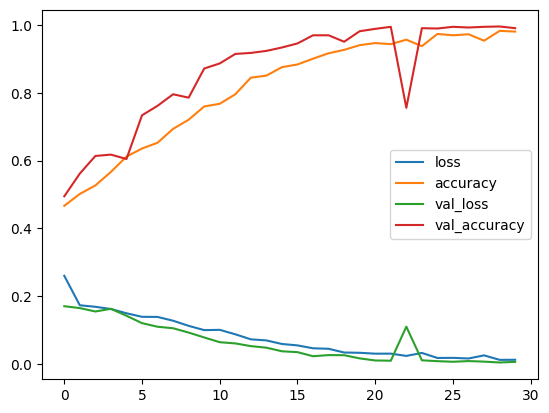

In [15]:
for key , value in hist.items():
  plt.plot(value , label = key )
plt.legend()
plt.show()
